<img src="Topic.png" width="800">

____________

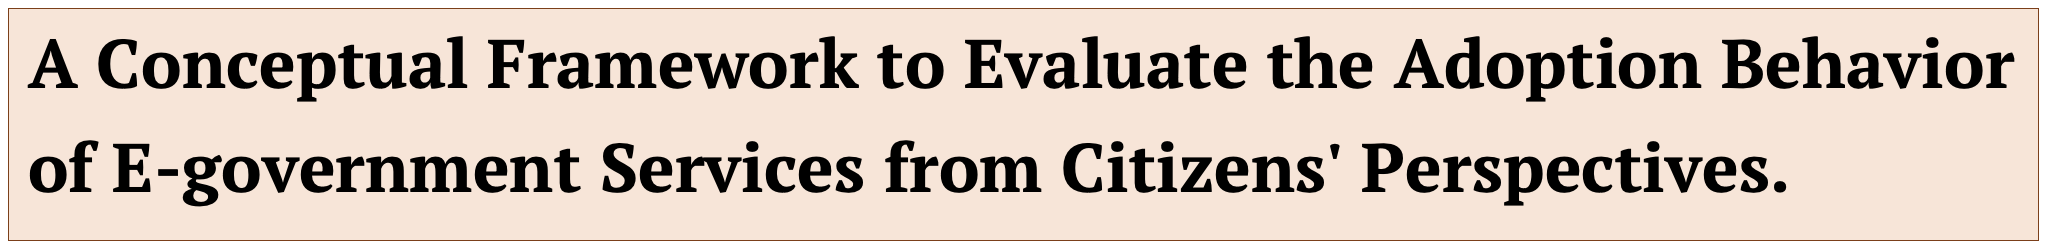

<img src="Guidelines.png" width="800">

____________

Below is the flowchart of the data analysis steps:

<img src="Steps.png" width="350">

____________

# Install Packages

In [ ]:
#pip install factor_analyzer

In [ ]:
#pip install pingouin

In [ ]:
#pip install semopy

In [ ]:
#pip install graphviz

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import math 
import semopy

# Import Data

In [ ]:
import csv

data0 = pd.read_csv('RawData.csv')
data = data0.dropna()
data.shape

In [ ]:
#Sum of Factors
PEOU=pd.DataFrame(data[['PEOU1','PEOU2','PEOU3','PEOU4']]).sum(axis=1)
PU=pd.DataFrame(data[['PU1','PU2','PU3','PU4']]).sum(axis=1)
SI=pd.DataFrame(data[['SI1','SI2','SI3','SI4']]).sum(axis=1)
FC=pd.DataFrame(data[['FC1','FC2','FC3','FC4']]).sum(axis=1)
TOG=pd.DataFrame(data[['TOG1','TOG2','TOG3','TOG4']]).sum(axis=1)
AB=pd.DataFrame(data[['ADOPT1','ADOPT2','ADOPT3','ADOPT4']]).sum(axis=1)
dat1=pd.DataFrame([PEOU,PU,SI,FC,TOG,AB]).transpose()

# Step 1: Preliminary Data Analysis

Below are the required assessments for the preliminary analysis along with their threshold value:

<img src="prelim.jpeg" width="700">

## 1- Missing Data Assssment

In [ ]:
# using dropna() function above, we dropped all raws with missing values.

## 2- Reliability Assessment

In [ ]:
import pingouin as pg

In [ ]:
# Cronbach’s Alpha  for all factors
pg.cronbach_alpha(data.iloc[:,5:28])

In [ ]:
# Cronbach’s Alpha  for reliability of PEOU
pg.cronbach_alpha(data=data[['PEOU1','PEOU2','PEOU3','PEOU4']])

In [ ]:
# Cronbach’s Alpha  for reliability of PU
pg.cronbach_alpha(data=data[['PU1','PU2','PU3','PU4']])

In [ ]:
# Cronbach’s Alpha  for reliability of SI
pg.cronbach_alpha(data=data[['SI1','SI2','SI3','SI4']])

In [ ]:
# Cronbach’s Alpha  for reliability of FC
pg.cronbach_alpha(data=data[['FC1','FC2','FC3','FC4']])

In [ ]:
# Cronbach’s Alpha  for reliability of TOG
pg.cronbach_alpha(data=data[['TOG1','TOG2','TOG3','TOG4']])

In [ ]:
# Cronbach’s Alpha  for reliability of AB
pg.cronbach_alpha(data=data[['ADOPT1','ADOPT2','ADOPT3','ADOPT4']])

## 3- Outliers Asssessment

In [ ]:
# Covariance matrix
dat21=data.iloc[:,4:28]
dat2=pd.DataFrame(dat21)
covariance  = np.cov(dat2 , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(dat2 , axis=0)
p2=centerpoint

In [ ]:
# Chi-Square is used to find cutoff value is, Mahalanobis Distance returns the distance as squared (D² )
from scipy.stats import chi2
from matplotlib import patches

In [ ]:
# Distances between center point of measurement items
p2=centerpoint
dat2 = dat2.to_numpy()
distances=[]
for i, val in enumerate(dat2):
      p1 = val
      p2= centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.999, dat2.shape[1]) 
chi2_value=cutoff ## Chi-square vale at alpha=0.001, 24(df)

# Index of outliers
outlierIndexes= np.where(distances>cutoff )
print('Index of Outliers')
print(outlierIndexes)
print('Observations found as outlier')

In [ ]:
# Results shows that, no outlier exist in the data

In [ ]:
chi2_value # for outlier

In [ ]:
distances #  for outlier

# Step 2: Dimensionality Assessment

Below are the required assessments for the dimenstionality analysis along with their threshold value:

<img src="DimentionalityAssessment.png" width="700">

## 1- Data Adequacy Assesment

In [ ]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis.
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
kmo_model

In [ ]:
# Bartlett’s test of sphericity checking
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

## 2- Communality Assessment

In [ ]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer

In [ ]:
data1=data.iloc[:,4:28]

In [ ]:
fa=FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(data1)
loadings=fa.loadings_

In [ ]:
# Get variance of each factors
a=fa.get_factor_variance()
pd.DataFrame.from_records(a)

In [ ]:
## communalitie values
fa.get_communalities()

## 3- Eigenvalues

In [ ]:
# Get the eigenvector and eigenvalues
ev,v=fa.get_eigenvalues()
# Scree plot
xvals=range(1,data1.shape[1]+1)
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

In [ ]:
v  # Eigen-Values

## 4- EFA Factor Loadings

In [ ]:
#loadings
print(pd.DataFrame.from_records(loadings))

# Step 3: Measurement Model Analysis

## 1- GOF Indices for Measurement Model


Below are the required assessments for the GOF indices along with their threshold value:

<img src="GOF.png" width="600">

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
## For  one-factor congeneric measurement for PEOU, PU,SI, FC, TOG, AB 
# Factor Analysis packages 
# To Run each factor, we will replace values in the following code "data.iloc[]""

#data3=data.iloc[0:,4:8] # For PEOU
#data3=data.iloc[0:,8:12] # For PU
#data3=data.iloc[0:,12:16] # For SI
#data3=data.iloc[0:,16:20] # For FC
#data3=data.iloc[0:,20:24] # For TOG
data3=data.iloc[0:,24:28] # For AB
data3.shape
fa1 = FactorAnalyzer(n_factors=1,rotation=None, rotation_kwargs={})
fa1.fit(data3)
loadings=-fa1.loadings_
# Get variance of each factors
a1=fa1.get_factor_variance()
a1[0], loadings

In [ ]:
from semopy import Model
## # To Run each factor, we will repalace in the code on mode2 
#mod2 = """ PEOU =~ PEOU1 + PEOU2 + PEOU3 + PEOU4 """
#mod2 = """ PU =~ PU1 + PU2 + PU3 + PU4 """
#mod2 = """ SI =~ SI1 + SI2 + SI3 + SI4 """
#mod2 = """ FC =~ FC1 + FC2 + FC3 + FC4 """
#mod2 = """ TOG=~ TOG1 + TOG2 + TOG3 + TOG4 """
mod2 = """ AB =~ ADOPT1 + ADOPT2 + ADOPT3 + ADOPT4 """

model2 = Model(mod2)
model2.fit(data3)
stats2 = semopy.calc_stats(model2)
print(stats2.T)
Results=model2.inspect(std_est=True)
pd.set_option('display.max_rows', Results.shape[0]+1)
print(Results)


In [ ]:
# Calculating SRMR 
data3=pd.DataFrame(data3)
corr_Obs = np.corrcoef(data3 , rowvar=False)
lod = np.dot(loadings, loadings.T)
Corr_Exp = np.corrcoef(lod , rowvar=False)

In [ ]:
# p is the number of items for the given factor
p=4
var=p*(p+1)/2
SRMR=np.sqrt(np.mean((corr_Obs-Corr_Exp)**2)/var)
print('SRMR value:', SRMR)

______________________________________________________________________________________________________________________

## ((We run the following part if the GOF values are not satisfactory, otherwise ignore it)) 

## One factor Congeneric Measurement Model

Below are the required assessments for the one-factor congeneric analysis along with their threshold value:

<img src="OneFactor.png" width="700">

### A- Stndardized Factor Loading SFL


In [ ]:
Results=model2.inspect(std_est=True)
pd.set_option('display.max_rows', Results.shape[0]+1)
print(Results)

### B- Stndardized Residuals

In [ ]:
# Standardized Residuals (SR)
# the difference between both the observed and the estimated covariance.
lod = np.dot(loadings, loadings.T)
data3=pd.DataFrame(data3)
covariance  = np.cov(data3 , rowvar=False)
residuals =(covariance - lod)
#covariance 
print(residuals)

In [ ]:
## For  one-factor congeneric measurement for the given factor
import graphviz

semopy.semplot(model2,"plot.jpeg")

## ((The end of the One factor Congeneric Measuremnt Model Analysis))

___

## 2- The Convergent Validity

Below are the required assessments for the convergent validity analysis along with their threshold value:

<img src="ConvergentValidity.png" width="700">

### A- Stndardized Factor Loading SFL


In [ ]:
Results=model2.inspect(std_est=True)
pd.set_option('display.max_rows', Results.shape[0]+1)
print(Results)

### B- Composite Reliability (CR)


In [ ]:
# CR is are calculated via λ and E values.

# λ values are the standardized factor loading of the four items to the corresponding factor.
# E value is the respective error variance for item i.

# The formula of CR is = (sum of λ values)^2 / [(sum of λ values)^2 + (sum of E values)]
# The E value for each item is calculated as= 1- (λ value of that item)^2

In [ ]:
## CR for PEOU Factor
lamda = (0.75+0.84+0.85+0.87)**2
Evalue =0.44+0.29+0.28+0.24
crPEOU = lamda/(lamda+Evalue)

print('CR_PE0U:' ,crPEOU)

In [ ]:
## CR for PU Factor
lamda = (0.71+0.85+0.86+0.92)**2
Evalue =0.50+0.28+0.26+0.15
crPU = lamda/(lamda+Evalue)

print('CR_PU:' ,crPU)

In [ ]:
## CR for SI Factor
lamda = (0.77+0.89+0.85+0.91)**2
Evalue=0.41+0.21+0.28+0.17
crSI = lamda/(lamda+Evalue)

print('CR_SI:' ,crSI)

In [ ]:
## CR for FC Factor
lamda = (0.77+0.88+0.84+0.92)**2
Evalue=0.41+0.23+0.29+0.15
crFC = lamda/(lamda+Evalue)

print('CR_FC:' ,crFC)

In [ ]:
## CR for TOG Factor
lamda = (0.76+0.91+0.81+0.91)**2
Evalue=0.42+0.17+0.34+0.17
crTOG = lamda/(lamda+Evalue)

print('CR_TOG:' ,crTOG)

In [ ]:
## AB Factor
lamda = (0.82+0.85+0.81+0.90)**2
Evalue=0.33+0.28+0.34+0.19
crAB = lamda/(lamda+Evalue)

print('CR_AB:' ,crAB)

###  C- Average Variance Extracted (AVE)


In [ ]:
# AVE is are calculated via via λ and E values.

# λ values are the standardized factor loading of the four items to the corresponding factor.
# E value is the variance of the error term for each item.

# The formula of AVE is = (the sum of squared λ values per each item) / [the sum of squared λ values per each item + (sum of E values)]
# The E value for each item is calculated as= 1- (λ value of that item)^2 

In [ ]:
## AVE for PEOU Factor
lamda=0.75**2+0.84**2+0.85**2+0.87**2
Evalue =0.44+0.29+0.28+0.24
avePEOU = lamda/(lamda+Evalue)

print('AVE_PEOU:',avePEOU)

In [ ]:
## AVE for PU Factor
lamda=0.71**2+0.85**2+0.86**2+0.92**2
Evalue =0.50+0.28+0.26+0.15
avePU = lamda/(lamda+Evalue)

print('AVE_PU:',avePU)

In [ ]:
## AVE for SI Factor
lamda=0.77**2+0.89**2+0.85**2+0.91**2
Evalue=0.41+0.21+0.28+0.17
aveSI = lamda/(lamda+Evalue)

print('AVE_SI:',aveSI)

In [ ]:
## AVE for FC Factor
lamda=0.77**2+0.88**2+0.84**2+0.92**2
Evalue=0.41+0.23+0.29+0.15
aveFC = lamda/(lamda+Evalue)

print('AVE_FC:',aveFC)

In [ ]:
## AVE for TOG Factor
lamda=0.76**2+0.91**2+0.81**2+0.91**2
Evalue=0.42+0.17+0.34+0.17
aveTOG = lamda/(lamda+Evalue)

print('AVE_TOG:',aveTOG)

In [ ]:
## AVE for AB Factor
lamda=0.82**2+0.85**2+0.81**2+0.90**2
Evalue=0.33+0.28+0.34+0.19
aveAB = lamda/(lamda+Evalue)

print('AVE_AB:',aveAB)

## 3- The Discriminant Validity

The required assessment for the discriminant validity is caculated by the square root of AVE for each independent factor. 

The square root of AVE of each factor should be greater than its correlation with other factors.

In [ ]:
# Calculate the square root of AVE for each independent factor.
print('Discriminant validity of PEOU factor:',np.sqrt(avePEOU))
print('Discriminant validity of PU factor:',np.sqrt(avePU))
print('Discriminant validity of SI factor:',np.sqrt(aveSI))
print('Discriminant validity of FC factor:',np.sqrt(aveFC))
print('Discriminant validity of TOG factor:',np.sqrt(aveTOG))

# Step 4: Structural Model Analysis

## 1- GOF Indices for Structural Model

The same GOF indices are calculated for the structural model.

In [ ]:
from semopy import Model
mod = """ PEOU =~ PEOU1 + PEOU2 + PEOU3+PEOU4
PU =~ PU1 + PU2 + PU3 + PU4
SI =~ SI1+ SI2 + SI3+ SI4
FC =~ FC1+ FC2 + FC3+ FC4
TOG =~ TOG1+ TOG2 + TOG3+ TOG4
AB =~ADOPT1+ADOPT2+ADOPT3+ADOPT4
# regressions
AB~PEOU
AB~PU
AB~SI
AB~FC
AB~TOG """
model = Model(mod)

In [ ]:
model.fit(data)

In [ ]:
stats = semopy.calc_stats(model)
print(stats.T)

In [ ]:
# Calculating SRMR 
from factor_analyzer import FactorAnalyzer

data1=data.iloc[0:,4:28]
fa2=FactorAnalyzer(n_factors=6, rotation="varimax")
fa2.fit(data1)
loadings=fa2.loadings_
corr_Obs = np.corrcoef(data1 , rowvar=False)
lod = np.dot(loadings, loadings.T)
Corr_Exp = np.corrcoef(lod , rowvar=False)

In [ ]:
# p is the number of items/variables for the whole structural model
p=24
var=p*(p+1)/2
SRMR=np.sqrt(np.mean((corr_Obs-Corr_Exp)**2)/var)
print('SRMR value:', SRMR)

## 2- Path Analysis

Below are the required assessments for the path analysis along with their threshold value:

<img src="pathAnalysis.png" width="700">

In [ ]:
insp=model.inspect(std_est=True)

pd.set_option('display.max_rows', insp.shape[0]+1)
print(insp)

In [ ]:
import graphviz

semopy.semplot(model,"plot_Data.jpeg", plot_exos=False, plot_covs=True,engine="neato")


In [ ]:
semopy.semplot(model,"plot.jpeg")

______________________________________________________________________________________________________________________

# ////// Extended Code for the Demogrphic Data //////

# A. Path Analysis per Gender

In [ ]:
import pandas as pd
import csv
data0 = pd.read_csv('RawData.csv')
data = data0.dropna()
data.shape

In [ ]:
#Model 1: For Male only
data = data[data["Gender"]==1]
###################################
# Model 2: For Female only
#data = data[data["Gender"]==2]
######################################
data.shape

In [ ]:
# measurement model
# The first step
from semopy import Model
mod = """ PEOU =~ PEOU1 + PEOU2 + PEOU3+PEOU4
PU =~ PU1 + PU2 + PU3 + PU4
SI =~ SI1+ SI2 + SI3+ SI4
FC =~ FC1+ FC2 + FC3+ FC4
TOG =~ TOG1+ TOG2 + TOG3+ TOG4
AB =~ADOPT1+ADOPT2+ADOPT3+ADOPT4
# regressions
AB~PEOU
AB~PU
AB~SI
AB~FC
AB~TOG """
model = Model(mod)

In [ ]:
model.fit(data)
#
insp=model.inspect(std_est=True)
pd.set_option('display.max_rows', insp.shape[0]+1)
print(insp)

In [ ]:
semopy.semplot(model,"plot_GenderData.jpeg", plot_exos=False, plot_covs=True,engine="neato")

In [ ]:
semopy.semplot(model,"Genderplot.jpeg")

# B.  Path Analysis per Education Level

In [ ]:
import pandas as pd
import csv
data0 = pd.read_csv('RawData.csv')
data = data0.dropna()
data.shape

In [ ]:
#Model 1: For Education evel: No formal school
#data = data[data["Education Level"]==1]
##################################
#Model 2: For Education evel: High school or less 
#data = data[data["Education Level"]==2]
##################################
#Model 3: For Education evel: Associate degree
#data = data[data["Education Level"]==3]
###################################
# Model 4: For Undergraduate degree
data = data[data["Education Level"]==4]
######################################
# Model 5: For Graduate degree
#data = data[data["Education Level"]==5]
data.shape

In [ ]:
# measurement model
# The first step
from semopy import Model
mod = """ PEOU =~ PEOU1 + PEOU2 + PEOU3+PEOU4
PU =~ PU1 + PU2 + PU3 + PU4
SI =~ SI1+ SI2 + SI3+ SI4
FC =~ FC1+ FC2 + FC3+ FC4
TOG =~ TOG1+ TOG2 + TOG3+ TOG4
AB =~ADOPT1+ADOPT2+ADOPT3+ADOPT4
# regressions
AB~PEOU
AB~PU
AB~SI
AB~FC
AB~TOG """
model = Model(mod)

In [ ]:
model.fit(data)
#
insp=model.inspect(std_est=True)
pd.set_option('display.max_rows', insp.shape[0]+1)
print(insp)

In [ ]:
semopy.semplot(model,"plot_EducationLevelData.jpeg", plot_exos=False, plot_covs=True,engine="neato")

In [ ]:
semopy.semplot(model,"Educationplot.jpeg")

# C.  Path Analysis per Age group

In [ ]:
import csv
data0 = pd.read_csv('RawData.csv')
data = data0.dropna()
data.shape

In [ ]:
#Model 1: For Age group: 18-30 years old
#data = data[data["Age Group"]==1]
##################################
#Model 2: For Age group: 31-40 years old
#data = data[data["Age Group"]==2]
###################################
# Model 3: For Age group: 41-50 years old
#data = data[data["Age Group"]==3]
######################################
# Model 4: For Age group: 51-60 years old
data = data[data["Age Group"]==4]
data.shape

In [ ]:
# measurement model
# The first step
from semopy import Model
mod = """ PEOU =~ PEOU1 + PEOU2 + PEOU3+PEOU4
PU =~ PU1 + PU2 + PU3 + PU4
SI =~ SI1+ SI2 + SI3+ SI4
FC =~ FC1+ FC2 + FC3+ FC4
TOG =~ TOG1+ TOG2 + TOG3+ TOG4
AB =~ADOPT1+ADOPT2+ADOPT3+ADOPT4
# regressions
AB~PEOU
AB~PU
AB~SI
AB~FC
AB~TOG """
model = Model(mod)

In [ ]:
model.fit(data)
#
insp=model.inspect(std_est=True)
pd.set_option('display.max_rows', insp.shape[0]+1)
print(insp)

In [ ]:
semopy.semplot(model,"AgeData.jpeg", plot_exos=False, plot_covs=True,engine="neato")

In [ ]:
semopy.semplot(model,"Ageplot.jpeg")